In [1]:
cd C:\Users\allis\Desktop\Data Science\Engineering\ds-project-data-engineering\data

C:\Users\allis\Desktop\Data Science\Engineering\ds-project-data-engineering\data


In [2]:
import pandas as pd 
import numpy as np

In [3]:
#Creaqting the dataframe
df = pd.read_csv('songswlyrics.csv')
df = df.replace('\n',' ', regex=True)
df.dropna(inplace=True)
df.reset_index(inplace=True)
df = df.head(3000)
df.drop(columns=['index','Unnamed: 0'],inplace=True)
df

,title,genre,lyrics
0,Abilene,Country/Bluegrass,Abilene Abilene prettiest town I've ever seen ...
1,Above And Beyond (The Call Of Love),Country/Bluegrass,Well I'll give you love that's above and beyon...
2,AC/DC Current,Jazz,"Y'all know me, still the same Eevee The old 13..."
3,Acadian Driftwood,Folk/Roots,The war was over And the spirit was broken The...
4,Ac-Cent-Tchu-Ate The Positive,Swing,"Gather 'round me, everybody Gather 'round me, ..."
...,...,...,...
2995,"Old Rivers (aka That Mule, Old Rivers, And Me)",Country/Bluegrass,"Oh shit, I guess we're starting The mic is whe..."
2996,"Old Rugged Cross, The",Gospel,On a hill far away stood an old rugged cross T...
2997,Old Time Rock And Roll,Rock/Pop,Just take those old records off the shelf I'll...
2998,"Oldest Established, The",Jazz,The Biltmore garage wants a grand But we ain'...


In [4]:
import nltk #wordcleaner imports
import seaborn as sns
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\allis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\allis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
def remove_punct(text):
    w = re.sub(r'[^\w\s]',' ',text) #remove everything except words and space
    w = re.sub(r'_',' ',w) # remove underscore as well
    return w

In [6]:
#Data Cleaning / shortening
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop = (stopwords.words('english')) # removes stopwords from 'english' list
stop_words = set(stop)
stop.append(["i've","i ","i'm",'(',')'])#added missing stopwords

df.lyrics = df.lyrics.str.lower() # put everything lowercase

tokenizer = nltk.RegexpTokenizer(r"\w+") #removes all symbols 
new_words = df['lyrics'].apply(tokenizer.tokenize)
test = (new_words).apply((',').join)
df['lyrics']= test.str.replace(',',' ')


def remove_sw(x):
    x = x.split(' ')
    return  ' '.join(z for z in x if z not in stop_words)
stopped = df["lyrics"].apply(remove_sw) # removes all stop words

df['lyrics'] = stopped.str.replace('[^a-zA-Z]', ' ') #data without stopped words

#grouping all simlar family words together to reduce noise
lem = WordNetLemmatizer() 
lemd = [lem.lemmatize(i) for i in stopped]
prepeared_sentence = [''.join(j) for j in lemd]
df['lyrics'] = prepeared_sentence
wordlist = ((str(prepeared_sentence)).split(" "))
wordlist.remove("['abilene")

<ipython-input-6-e34e9b8bbe41>:23: FutureWarning: The default value of regex will change from True to False in a future version.
  df['lyrics'] = stopped.str.replace('[^a-zA-Z]', ' ') #data without stopped words


In [7]:
#vector funtime
from sklearn.feature_extraction.text import CountVectorizer
vectzr = CountVectorizer()
X = vectzr.fit_transform(prepeared_sentence)
vectdata = pd.DataFrame(X.toarray())


In [8]:
vectdata

,0,1,2,3,4,5,6,7,8,9,...,70971,70972,70973,70974,70975,70976,70977,70978,70979,70980
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,20,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.genre.unique()
genreint = df.genre.map({'Country/Bluegrass':0, 'Jazz':1, 'Folk/Roots':2, 'Swing':3,
       'Dance/Electronica':4, 'Rock/Pop':5, 'Hip-Hop':6, 'R & B/Soul':7, 'Reggae':8,
       'Blues':9, 'Musical/Film':10, 'Gospel':11, 'Ragtime':12,
       'Classical/ Contemporary':13})
genreint

0        0
1        0
2        1
3        2
4        3
        ..
2995     0
2996    11
2997     5
2998     1
2999     4
Name: genre, Length: 3000, dtype: int64

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import LinearSVC as lsvc
from sklearn.metrics import confusion_matrix

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['lyrics'])
y = genreint

X_train,X_test,y_train,y_test = tts(X,y, test_size = .1, random_state = 0)
clf = lsvc(C=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

C:\Users\allis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [11]:
from sklearn.metrics import r2_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.14      0.15        29
           1       0.23      0.35      0.28        43
           2       0.05      0.06      0.05        17
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        24
           5       0.29      0.33      0.31        73
           6       0.55      0.41      0.47        29
           7       0.28      0.19      0.23        37
           8       1.00      0.33      0.50         3
           9       0.08      0.08      0.08        12
          10       0.15      0.19      0.17        27
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.23       300
   macro avg       0.20      0.15      0.16       300
weighted avg       0.24      0.23      0.23       300

C:\Users\allis\AppData\Lo

In [12]:
from sklearn.decomposition import PCA
import statsmodels.api as sm
import scipy as sc
wordLabels = vectorizer.get_feature_names()
Xd = X.toarray()
Xd = PCA(50).fit(Xd.T).components_.T
Xd = sm.add_constant(Xd)
pred = Xd @ sc.linalg.inv(Xd.T @ Xd) @ Xd.T @ genreint.values
print("OLS R^2: ", r2_score(genreint, pred)) #decent are score

OLS R^2:  0.02477760358903658


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = vectdata.values
distortions = []
k_min = 1
k_max = 30
for i in range(k_min, k_max):
    km = KMeans(
        n_clusters=i, init='random',
        max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.figure()
plt.plot(range(k_min, k_max), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cluster_num = 14
model_kmean = KMeans(n_clusters=cluster_num, init='random', max_iter=300, tol=1e-04, random_state=0)
model_kmean.fit(vectdata.values)

KMeans(init='random', n_clusters=14, random_state=0)

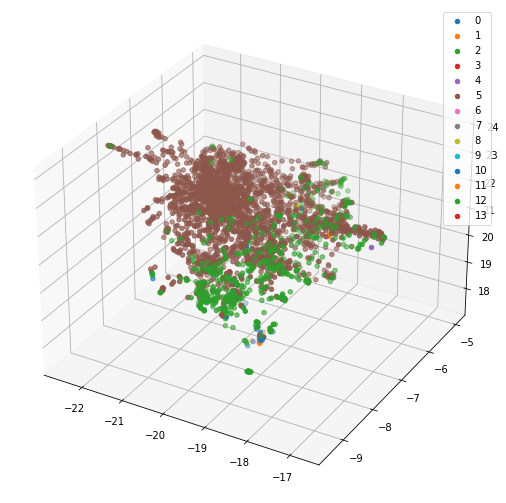

In [14]:
from sklearn.datasets import load_digits
import seaborn as sns
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import umap

data = vectdata.values
# using UMAP as manifold model
# fig, ax = plt.subplots(figsize=(10, 10))
model_viz = umap.UMAP(n_neighbors=20, n_components=3)
reduced_emb = model_viz.fit_transform(data)

a = pd.DataFrame({'x':reduced_emb[:,0], 'y':reduced_emb[:,1], 'z':reduced_emb[:,2], 'label':model_kmean.labels_})

plt.figure('K-Means on lyrics', figsize=(12,9))
ax = plt.axes(projection = '3d')

for i in range(model_kmean.n_clusters):
    each = a[a.label==i][list('xyz')].values
    ax.scatter(each[:,2],each[:,1],each[:,0], label=f'{i}')

ax.legend()
plt.show()